In [3]:
import pandas as pd
from source.getData import subtractDays

# Keeping the date dynamic:
today = pd.Timestamp("today").strftime("%Y-%m-%d")
# going back 37 days (37 days for the url $where=date> to work as intended 
# and to calculate the rolling 7 day avg for last 30 days)
last37Days = subtractDays(today,37)


In [4]:
url = f'https://healthdata.gov/resource/j8mb-icvb.json?$where=date>\"{last37Days}\"&$limit=10000'
print(url)


https://healthdata.gov/resource/j8mb-icvb.json?$where=date>"2023-04-16"&$limit=10000


In [5]:
df = pd.read_json(url)
df

,state,state_name,state_fips,fema_region,overall_outcome,date,new_results_reported,total_results_reported
0,AL,Alabama,1,Region 4,Inconclusive,2023-04-17,0,18796
1,AL,Alabama,1,Region 4,Negative,2023-04-17,4744,7989031
2,AL,Alabama,1,Region 4,Positive,2023-04-17,156,1288287
3,AK,Alaska,2,Region 10,Inconclusive,2023-04-17,0,5251
4,AK,Alaska,2,Region 10,Negative,2023-04-17,532,4382348
...,...,...,...,...,...,...,...,...
5128,WI,Wisconsin,55,Region 5,Negative,2023-05-20,988,17548081
5129,WI,Wisconsin,55,Region 5,Positive,2023-05-20,67,1926399
5130,WY,Wyoming,56,Region 8,Inconclusive,2023-05-20,0,4013
5131,WY,Wyoming,56,Region 8,Negative,2023-05-20,13,1440651


In [6]:
len(df['date'].unique())

34

## Track 1: Assuming that "new cases per day" means "new_results_reported per day" 

In [10]:
# Track 1:
# Assuming that "new cases per day" means "new_results_reported per day" 
nrr_data = []
for current_day in df['date'].unique():
    df_current_day = df.loc[(df['date'] == current_day)]
    current_day_newResultsReported = df_current_day['new_results_reported'].sum()
    current_day_data = [current_day, current_day_newResultsReported]    
    nrr_data.append(current_day_data)

nrr_df = pd.DataFrame(nrr_data, columns=['date','new_results_reported'])

nrr_df['rolling7'] = nrr_df['new_results_reported'].rolling(window=7).mean()
nrr_df

,date,new_results_reported,rolling7
0,2023-04-17,191693,NaN
1,2023-04-18,224275,NaN
2,2023-04-19,220363,NaN
3,2023-04-20,203802,NaN
4,2023-04-21,183382,NaN
5,2023-04-22,132297,NaN
6,2023-04-23,100348,179451.428571
7,2023-04-24,174771,177034.000000
8,2023-04-25,205662,174375.000000
9,2023-04-26,207948,172601.428571


<Axes: xlabel='date'>

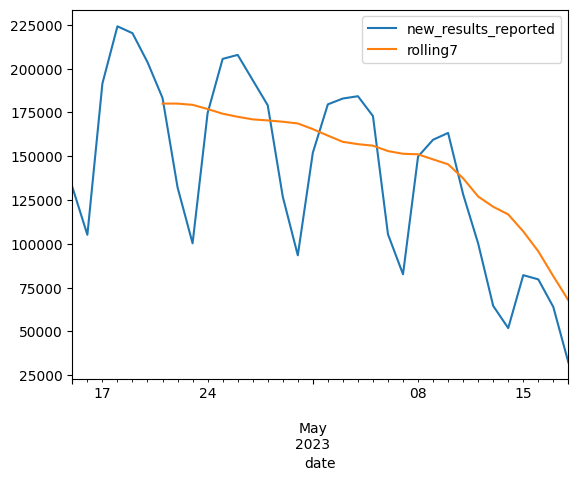

In [71]:
nrr_df.plot(x='date')

## Track 2: Assuming that "new cases per day" means "new Positive cases per day" 

In [11]:
# Track 2:
# Assuming that "new cases per day" means "new Positive cases per day" 
nrr_data = []
for current_day in df['date'].unique():
    df_current_day = df.loc[(df['date'] == current_day)]
    current_day_positive = df_current_day.loc[df_current_day.overall_outcome == 'Positive']['new_results_reported'].sum()
    current_day_data = [current_day,current_day_positive]    
    nrr_data.append(current_day_data)

nrr_columns = ['date','current_day_positive']
nrr_df = pd.DataFrame(nrr_data, columns=nrr_columns)

nrr_df['rolling7'] = nrr_df['current_day_positive'].rolling(window=7).mean()
nrr_df

,date,current_day_positive,rolling7
0,2023-04-17,10758,NaN
1,2023-04-18,11036,NaN
2,2023-04-19,10935,NaN
3,2023-04-20,9806,NaN
4,2023-04-21,9160,NaN
5,2023-04-22,6698,NaN
6,2023-04-23,5674,9152.428571
7,2023-04-24,9008,8902.428571
8,2023-04-25,9708,8712.714286
9,2023-04-26,9886,8562.857143


<Axes: xlabel='date'>

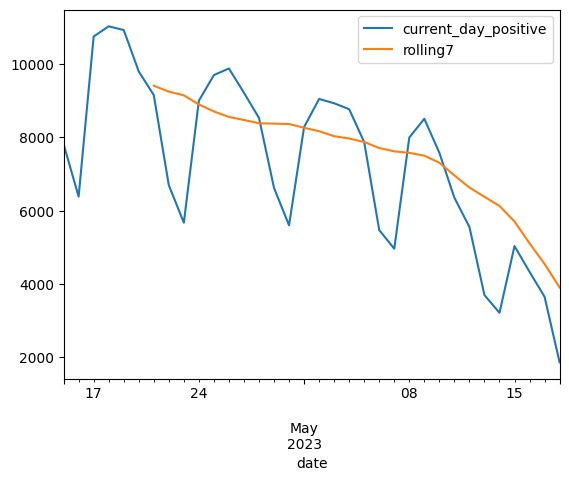

In [77]:
nrr_df.plot(x='date')